# Model Training & Evaluation via Scikit-Learn

This notebooks uses the train/test split in `1_databricks_cleaning_feature_engineering_full_data` Databricks notebook to train two modeling pipelines using Scikit-Learn:
1. Penalized Logistic Regression
2. Gradient-Boosted Trees 

In [11]:
# import libraries
import sys
sys.path.append("../src")
from sparkifychurn import trainModel, evaluateModel
import pandas as pd
pd.set_option("max.columns", None)
pd.set_option("max.rows", None)
import seaborn as sns
import numpy as np

## Load Data 

In [2]:
train = pd.read_parquet("../data/train_data_full")
test = pd.read_parquet("../data/test_data_full")

In [3]:
train.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,churn,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,1076191,M,64,14715.27661,0,3,0,1,3,0,5,0,1,0,0,1,0,47,4,0,0,0,0,16,48,9,7,7.876053,0.800000,21.333333,15.666667,4.323611,1.441204,14.802441,0.0,0.231288,0.693864,0.000000,1.156441,0.0,0.000000,0.000000,0.231288,0.000000,10.870543,0.925153,0.000000,0.000000,0.000000,3.700610
1,1156065,M,328,55511.66667,0,11,0,4,17,0,43,0,1,1,2,2,2,231,10,3,3,0,0,96,233,70,25,16.535961,0.714286,29.818182,21.000000,14.886944,1.353359,22.032728,0.0,0.268692,1.141940,0.000000,2.888437,0.0,0.067173,0.134346,0.134346,0.134346,15.516952,0.671730,0.201519,0.201519,0.000000,6.448603
2,1358765,M,235,44019.77193,1,5,0,1,14,2,4,0,1,1,1,2,6,179,14,2,3,0,1,55,181,28,26,17.818125,0.933333,47.000000,35.800000,11.924444,2.384889,19.707417,0.0,0.083861,1.174059,0.167723,0.335445,0.0,0.083861,0.083861,0.167723,0.503168,15.011182,1.174059,0.167723,0.251584,0.000000,4.612374
3,1390009,M,218,44514.53023,1,3,0,2,5,4,0,0,1,0,0,5,3,181,15,0,0,1,0,36,186,10,21,25.400405,0.882353,72.666667,60.333333,12.123889,4.041296,17.981029,0.0,0.164964,0.412409,0.329927,0.000000,0.0,0.000000,0.000000,0.412409,0.247445,14.929203,1.237227,0.000000,0.000000,0.082482,2.969344
4,1396378,F,119,23079.16854,0,1,0,0,3,0,8,0,1,0,0,2,0,91,10,0,1,0,0,27,93,13,13,0.289051,1.000000,119.000000,91.000000,6.937222,6.937222,17.153840,0.0,0.000000,0.432450,0.000000,1.153199,0.0,0.000000,0.000000,0.288300,0.000000,13.117642,1.441499,0.000000,0.144150,0.000000,3.892048


In [4]:
X_train = train.drop("churn", axis=1)
y_train = train["churn"]

X_test = test.drop("churn", axis=1)
y_test = test["churn"]

In [5]:
X_train.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,1076191,M,64,14715.27661,0,3,0,1,3,0,5,0,0,0,1,0,47,4,0,0,0,0,16,48,9,7,7.876053,0.800000,21.333333,15.666667,4.323611,1.441204,14.802441,0.0,0.231288,0.693864,0.000000,1.156441,0.0,0.000000,0.000000,0.231288,0.000000,10.870543,0.925153,0.000000,0.000000,0.000000,3.700610
1,1156065,M,328,55511.66667,0,11,0,4,17,0,43,0,1,2,2,2,231,10,3,3,0,0,96,233,70,25,16.535961,0.714286,29.818182,21.000000,14.886944,1.353359,22.032728,0.0,0.268692,1.141940,0.000000,2.888437,0.0,0.067173,0.134346,0.134346,0.134346,15.516952,0.671730,0.201519,0.201519,0.000000,6.448603
2,1358765,M,235,44019.77193,1,5,0,1,14,2,4,0,1,1,2,6,179,14,2,3,0,1,55,181,28,26,17.818125,0.933333,47.000000,35.800000,11.924444,2.384889,19.707417,0.0,0.083861,1.174059,0.167723,0.335445,0.0,0.083861,0.083861,0.167723,0.503168,15.011182,1.174059,0.167723,0.251584,0.000000,4.612374
3,1390009,M,218,44514.53023,1,3,0,2,5,4,0,0,0,0,5,3,181,15,0,0,1,0,36,186,10,21,25.400405,0.882353,72.666667,60.333333,12.123889,4.041296,17.981029,0.0,0.164964,0.412409,0.329927,0.000000,0.0,0.000000,0.000000,0.412409,0.247445,14.929203,1.237227,0.000000,0.000000,0.082482,2.969344
4,1396378,F,119,23079.16854,0,1,0,0,3,0,8,0,0,0,2,0,91,10,0,1,0,0,27,93,13,13,0.289051,1.000000,119.000000,91.000000,6.937222,6.937222,17.153840,0.0,0.000000,0.432450,0.000000,1.153199,0.0,0.000000,0.000000,0.288300,0.000000,13.117642,1.441499,0.000000,0.144150,0.000000,3.892048


In [6]:
X_train[X_train['gender'].isnull()]

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
4758,1261737,None,778479,0.0,1,158115,0,0,409978,0,0,0,44382,0,0,0,0,0,25652,0,914,0,778479,0,480814,296751,60.99978,0.0,4.923499,0.0,1.437098e+07,90.889396,0.05417,0.0,0.0,0.028528,0.0,0.0,0.0,0.003088,0.0,0.0,0.0,0.0,0.0,0.001785,0.0,0.000064,0.05417


# Modeling

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
import joblib

### Train Logistic Regression Pipeline 

In [8]:
X_train.head()

,userId,gender,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
0,1076191,M,64,14715.27661,0,3,0,1,3,0,5,0,0,0,1,0,47,4,0,0,0,0,16,48,9,7,7.876053,0.800000,21.333333,15.666667,4.323611,1.441204,14.802441,0.0,0.231288,0.693864,0.000000,1.156441,0.0,0.000000,0.000000,0.231288,0.000000,10.870543,0.925153,0.000000,0.000000,0.000000,3.700610
1,1156065,M,328,55511.66667,0,11,0,4,17,0,43,0,1,2,2,2,231,10,3,3,0,0,96,233,70,25,16.535961,0.714286,29.818182,21.000000,14.886944,1.353359,22.032728,0.0,0.268692,1.141940,0.000000,2.888437,0.0,0.067173,0.134346,0.134346,0.134346,15.516952,0.671730,0.201519,0.201519,0.000000,6.448603
2,1358765,M,235,44019.77193,1,5,0,1,14,2,4,0,1,1,2,6,179,14,2,3,0,1,55,181,28,26,17.818125,0.933333,47.000000,35.800000,11.924444,2.384889,19.707417,0.0,0.083861,1.174059,0.167723,0.335445,0.0,0.083861,0.083861,0.167723,0.503168,15.011182,1.174059,0.167723,0.251584,0.000000,4.612374
3,1390009,M,218,44514.53023,1,3,0,2,5,4,0,0,0,0,5,3,181,15,0,0,1,0,36,186,10,21,25.400405,0.882353,72.666667,60.333333,12.123889,4.041296,17.981029,0.0,0.164964,0.412409,0.329927,0.000000,0.0,0.000000,0.000000,0.412409,0.247445,14.929203,1.237227,0.000000,0.000000,0.082482,2.969344
4,1396378,F,119,23079.16854,0,1,0,0,3,0,8,0,0,0,2,0,91,10,0,1,0,0,27,93,13,13,0.289051,1.000000,119.000000,91.000000,6.937222,6.937222,17.153840,0.0,0.000000,0.432450,0.000000,1.153199,0.0,0.000000,0.000000,0.288300,0.000000,13.117642,1.441499,0.000000,0.144150,0.000000,3.892048


In [22]:
X_train.describe()

,count_items,sum_length,paid,session_count,submit_downgrade_count,thumbs_down_count,home_count,downgrade_count,advert_count,save_settings_count,about_count,settings_count,add_playlist_count,add_friend_count,next_song_count,thumbs_up_count,help_count,upgrade_count,error_count,submit_upgrade,non_song_interaction_count,PUT_200_count,GET_200_count,PUT_307_count,tenure_days,thumbs_up_pct,avg_items_session,avg_songs_session,sum_session_length_hours,avg_session_length_hours,interaction_rate,submit_downgrade_rate,thumbs_down_rate,home_rate,downgrade_rate,advert_rate,save_settings_rate,about_rate,settings_rate,add_playlist_rate,add_friend_rate,next_song_rate,thumbs_up_rate,help_rate,upgrade_rate,error_rate,non_song_interaction_rate
count,15438.000000,1.543800e+04,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,1.543800e+04,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000,15438.000000
mean,1194.945330,2.329301e+05,0.726325,23.600531,0.293173,10.737660,68.532517,8.258194,17.332362,1.328216,5.047869,6.614264,26.824394,17.144319,936.479855,51.709613,7.454787,2.274777,1.188755,0.543140,258.242454,963.304249,115.789740,114.662586,41.061946,0.796281,80.717959,65.441668,9.965126e+02,4.605009,20.647108,0.004575,0.185911,1.344240,0.103185,0.622686,0.023280,0.035116,0.116320,0.404918,0.286972,15.174116,0.784900,0.091722,0.068272,0.018508,5.422454
std,6395.675565,2.749284e+05,0.445859,1272.517591,0.611326,12.717264,3299.614939,11.647610,20.627350,1.892491,357.194521,7.903184,32.225740,20.685406,1105.319179,64.643390,206.533129,2.657349,7.535479,0.498152,6267.812890,1137.114956,3869.994666,2390.140152,18.777299,0.170748,48.411869,41.204244,1.156615e+05,3.023447,134.576040,0.014451,0.246316,41.647584,0.361934,1.992897,0.067821,0.069414,0.191181,0.198883,1.583327,50.534241,0.397824,0.111405,0.126620,0.050382,92.907220
min,1.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,264.000000,5.065526e+04,0.000000,5.000000,0.000000,2.000000,11.000000,0.000000,3.000000,0.000000,0.000000,1.000000,5.000000,3.000000,204.000000,10.000000,1.000000,0.000000,0.000000,0.000000,58.000000,209.000000,28.000000,22.000000,29.096563,0.760000,45.500000,35.000000,1.422285e+01,2.447603,17.305274,0.000000,0.105363,0.574508,0.000000,0.063400,0.000000,0.000000,0.057924,0.328044,0.176888,14.216486,0.622944,0.044718,0.000000,0.000000,2.931552
50%,685.500000,1.362989e+05,1.000000,9.000000,0.000000,6.000000,26.000000,4.000000,11.000000,1.000000,1.000000,4.000000,15.000000,10.000000,548.000000,29.000000,3.000000,1.000000,1.000000,1.000000,134.000000,565.000000,58.500000,57.000000,48.228218,0.833333,73.565942,58.941667,3.842750e+01,4.127884,17.921983,0.000000,0.148571,0.674841,0.093300,0.296473,0.011090,0.024551,0.096223,0.402757,0.251238,14.574020,0.730552,0.081118,0.031717,0.005553,3.413579
75%,1522.000000,3.106616e+05,1.000000,17.000000,0.000000,15.000000,55.000000,12.000000,24.000000,2.000000,3.000000,9.000000,36.000000,23.000000,1250.000000,68.000000,8.000000,3.000000,2.000000,1.000000,274.000000,1286.000000,111.000000,127.000000,56.626782,0.884615,105.666667,86.830882,8.743299e+01,6.098828,18.953006,0.000000,0.209462,0.843916,0.153157,0.985318,0.02903

In [30]:
# Define variable types 
cat_vars = ["gender"]
bin_vars = ["paid", "submit_upgrade"]
num_vars = list(set(X_train.columns) - set(["userId", *bin_vars, *cat_vars]))


# Create hyper parameter grid for Logistic Regression
param_grid = {"model__penalty":["l1", "l2"],
              "model__C": np.logspace(-4,4,5), 
              "model__solver" : ["saga"]}

model = LogisticRegression(max_iter=100000)


cat_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent", missing_values=None)),
                                    ("ohe", OneHotEncoder(handle_unknown='ignore'))])

num_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "median")),
                                    ("scaler", StandardScaler())])

bin_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent"))])

preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, cat_vars),
                                                 ('num', num_transformer, num_vars), 
                                                 ('bin', bin_transformer, bin_vars)],
                                  remainder = "drop")

model_pipeline = Pipeline(steps=[("preprocessing", preprocessor),
                                 ("model",model)])

# Fit grid hyperparameter search model
lr_model = RandomizedSearchCV(model_pipeline, 
                              param_grid, 
                              cv = 5, 
                              random_state = 42)
lr_model = lr_model.fit(X_train, y_train)

In [43]:
lr_model

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(missing_values=None,
                                                                                                              strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender']),
                                                                              ('num',
                               

Logistic_Regression - Train Set AUROC: 0.882
Logistic_Regression - Test Set AUROC: 0.878


Logistic_Regression - Train Average Precision: 0.692
Logistic_Regression - Test Average Precision: 0.682


Logistic_Regression - Train No Skill Precision: 0.223
Logistic_Regression - Test No Skill Precision: 0.228

 ****Classification Report on Train Data***
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11995
           1       0.71      0.55      0.62      3443

    accuracy                           0.85     15438
   macro avg       0.79      0.74      0.76     15438
weighted avg       0.84      0.85      0.84     15438


 ****Classification Report on Test Data***
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5280
           1       0.72      0.56      0.63      1560

    accuracy                           0.85      6840
   macro avg       0.80      0.75      0.77      6840
weighte

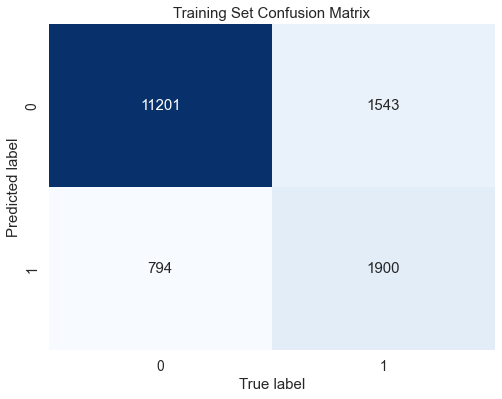

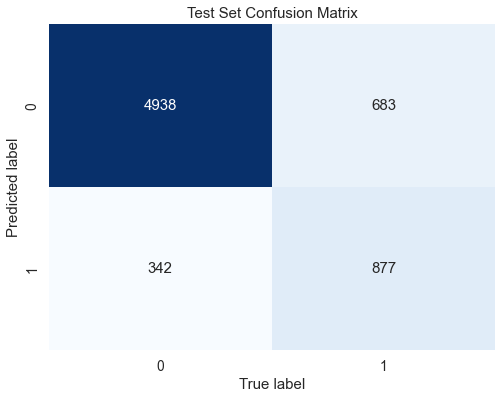

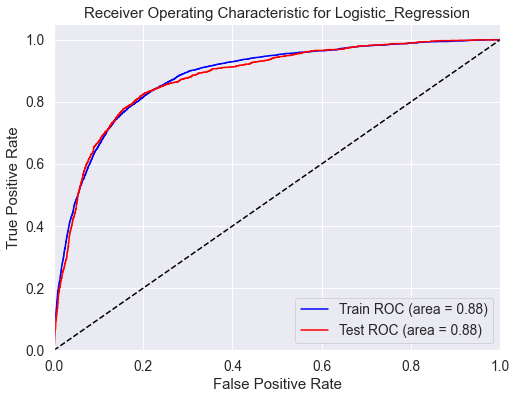

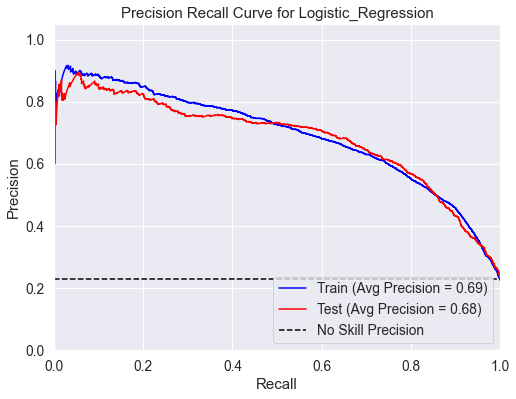

In [31]:
evaluateModel.evaluate_model(model = lr_model,
                             model_type = "sklearn",
                             model_name = "Logistic_Regression",
                             output_path = "../output/sklearn/full",
                             train = train,
                             test = test)

Logistic_Regression - Train Set AUROC: 0.882
Logistic_Regression - Test Set AUROC: 0.878


Logistic_Regression - Train Average Precision: 0.692
Logistic_Regression - Test Average Precision: 0.682


Logistic_Regression - Train No Skill Precision: 0.223
Logistic_Regression - Test No Skill Precision: 0.228

 ****Classification Report on Train Data***
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     11995
           1       0.70      0.55      0.62      3443

    accuracy                           0.85     15438
   macro avg       0.79      0.74      0.76     15438
weighted avg       0.84      0.85      0.84     15438


 ****Classification Report on Test Data***
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5280
           1       0.72      0.56      0.63      1560

    accuracy                           0.85      6840
   macro avg       0.80      0.75      0.77      6840
weighte

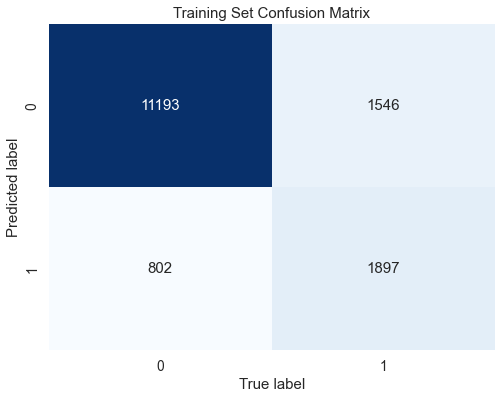

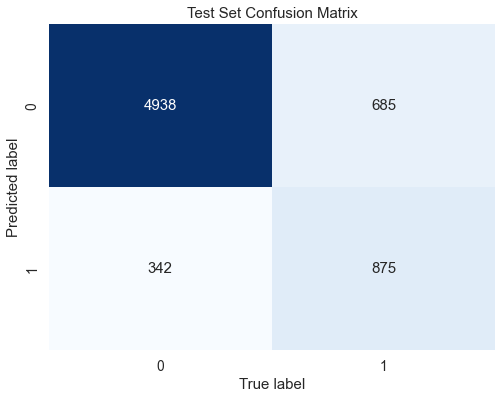

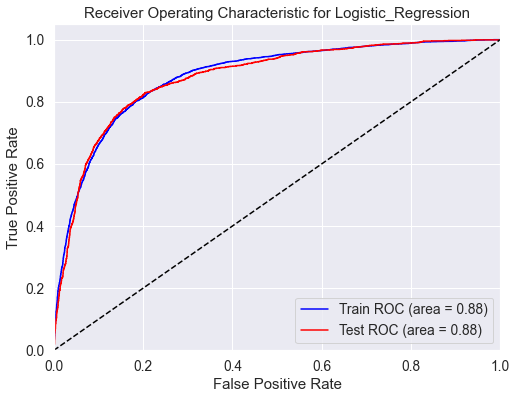

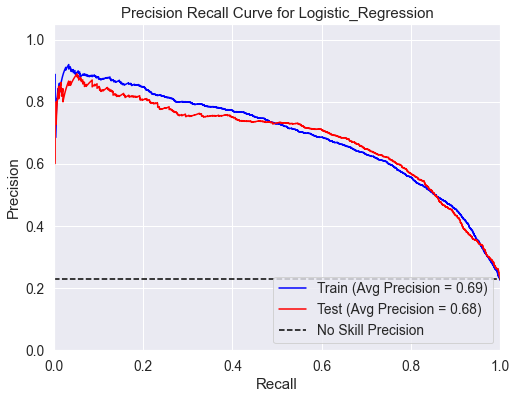

In [12]:
evaluateModel.evaluate_model(model = lr_model,
                             model_type = "sklearn",
                             model_name = "Logistic_Regression",
                             output_path = "../output/sklearn/full",
                             train = train,
                             test = test)

In [32]:
# Save sklearn model
joblib.dump(lr_model.best_estimator_, "../models/sklearn_lr_full.pkl", compress=3)

['../models/sklearn_lr_full.pkl']

### Train Gradient Boosting Classifier Pipeline

In [41]:
# Define variable types 
cat_vars = ["gender"]
bin_vars = ["paid", "submit_upgrade"]
num_vars = list(set(X_train.columns) - set(["userId", *bin_vars, *cat_vars]))

# Create hyper parameter grid for Logistic Regression
param_grid = {"model__learning_rate": [.01, .05, .1, .5, 1],
              "model__max_iter" : [50, 100, 150],
              "model__max_depth": [5,10,15,20,None]}

model = HistGradientBoostingClassifier()

cat_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent", missing_values=None)),
                                    ("ohe", OneHotEncoder(handle_unknown='ignore'))])

num_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "median")),
                                    ("scaler", StandardScaler())])

bin_transformer = Pipeline(steps = [("impute", SimpleImputer(strategy = "most_frequent"))])

preprocessor = ColumnTransformer(transformers = [('cat', cat_transformer, cat_vars),
                                                 ('num', num_transformer, num_vars), 
                                                 ('bin', bin_transformer, bin_vars)],
                                  remainder = "drop")

model_pipeline = Pipeline(steps=[("preprocessing", preprocessor),
                                 ("model",model)])

# Fit grid hyperparameter search model
gbc_model = RandomizedSearchCV(model_pipeline, 
                              param_grid, 
                              cv = 10, 
                              random_state = 42)
gbc_model = gbc_model.fit(X_train, y_train)

HistGradientBoostingClassifier - Train Set AUROC: 0.964
HistGradientBoostingClassifier - Test Set AUROC: 0.925


HistGradientBoostingClassifier - Train Average Precision: 0.912
HistGradientBoostingClassifier - Test Average Precision: 0.845


HistGradientBoostingClassifier - Train No Skill Precision: 0.223
HistGradientBoostingClassifier - Test No Skill Precision: 0.228

 ****Classification Report on Train Data***
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11995
           1       0.89      0.76      0.82      3443

    accuracy                           0.92     15438
   macro avg       0.91      0.86      0.89     15438
weighted avg       0.92      0.92      0.92     15438


 ****Classification Report on Test Data***
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5280
           1       0.84      0.71      0.77      1560

    accuracy                           0.90      

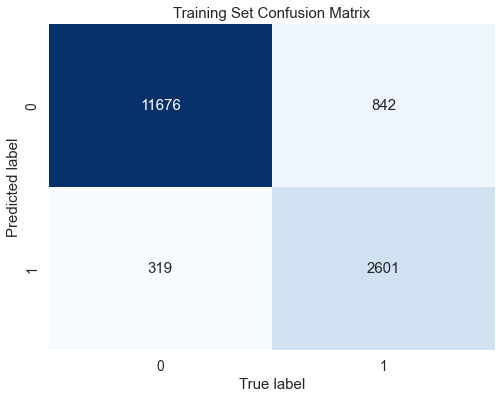

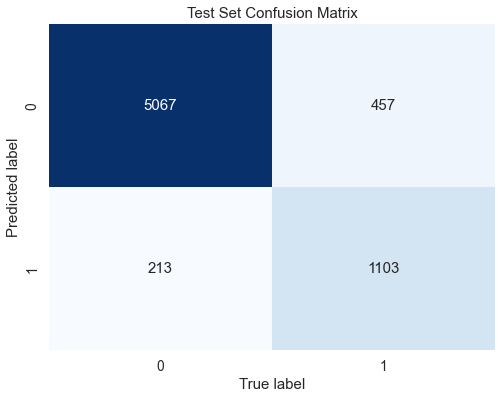

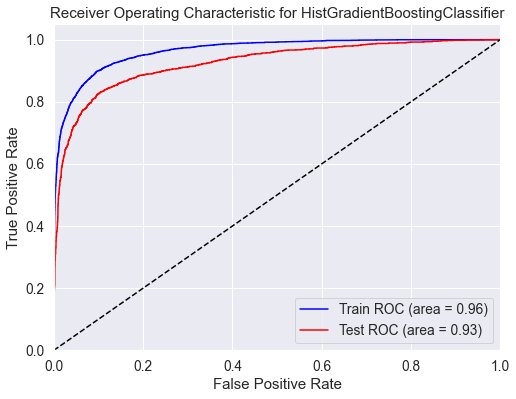

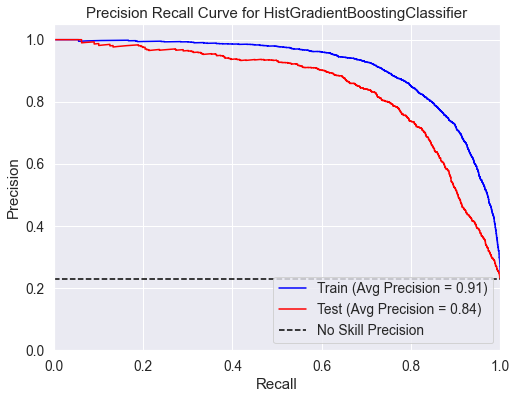

In [42]:
evaluateModel.evaluate_model(model = gbc_model,
                             model_type = "sklearn",
                             model_name = "HistGradientBoostingClassifier",
                             output_path = "../output/sklearn/full",
                             train = train,
                             test = test)

In [27]:
# Save sklearn model
joblib.dump(gbc_model.best_estimator_, "../models/sklearn_gbc_full.pkl", compress=3)

['../models/sklearn_gbc_full.pkl']